In [1]:
#read datafolder from Google Drive
from google.colab import drive
drive.mount('/content/drive')
# data_folder = '/content/drive/My Drive/pg2k18/sem2/smai/smai_proj/reuters21578/'
data_folder = '/content/drive/My Drive/reuters21578/'


sgml_number_of_files = 21
sgml_file_name_template = 'reut2-NNN.sgm'

# Category files
category_files = {
    'to_': ('Topics', 'all-topics-strings.lc.txt'),
    'pl_': ('Places', 'all-places-strings.lc.txt'),
    'pe_': ('People', 'all-people-strings.lc.txt'),
    'or_': ('Organizations', 'all-orgs-strings.lc.txt'),
    'ex_': ('Exchanges', 'all-exchanges-strings.lc.txt')
}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [0]:
# Read all categories
category_data = []
category_dictionary={'Topics':[],'Places':[],'People':[],'Organizations':[],'Exchanges':[]}
for category_prefix in category_files.keys():
    with open(data_folder + category_files[category_prefix][1], 'r') as file:
        for category in file.readlines():
            category_data.append([category_prefix + category.strip().lower(), 
                                  category_files[category_prefix][0]])

# Create category dataframe
for i in category_data:
    category_dictionary[i[1]].append(i[0].split('_')[1])
news_categories = pd.DataFrame(data=category_data)


In [4]:
print (category_dictionary)

{'Topics': ['acq', 'alum', 'austdlr', 'austral', 'barley', 'bfr', 'bop', 'can', 'carcass', 'castor-meal', 'castor-oil', 'castorseed', 'citruspulp', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'corn-oil', 'cornglutenfeed', 'cotton', 'cotton-meal', 'cotton-oil', 'cottonseed', 'cpi', 'cpu', 'crude', 'cruzado', 'dfl', 'dkr', 'dlr', 'dmk', 'drachma', 'earn', 'escudo', 'f-cattle', 'ffr', 'fishmeal', 'flaxseed', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-meal', 'groundnut-oil', 'heat', 'hk', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'inventories', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-meal', 'lin-oil', 'linseed', 'lit', 'livestock', 'lumber', 'lupin', 'meal-feed', 'mexpeso', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-meal', 'palm-oil', 'palmkernel', 'peseta', 'pet-chem', 'platinum', 'plywood', 'pork-belly', 'potato', 'p

In [5]:
import re
import xml.sax.saxutils as saxutils
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import nltk
nltk.download('stopwords')

Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
lemmatizer = WordNetLemmatizer()

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;\\n]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def cleanUpSentence(r):#, stop_words = None#
    r = r.lower().replace("<br />", " ")
    r = REPLACE_BY_SPACE_RE.sub(' ', r)
    r = BAD_SYMBOLS_RE.sub('', r)

    r = ' '.join(word for word in r.split() if word not in STOPWORDS)

    words = word_tokenize(r)

    for w in words:
        w = lemmatizer.lemmatize(w)

    return r

In [0]:
# Parse SGML files
def strip_tags(text):
    return re.sub('<[^<]+?>', '', text).strip()

def unescape(text):
    return saxutils.unescape(text)
  
def makeDict(filename, document_X):
  with open(filename, 'rb') as file:

    content = BeautifulSoup(file.read().lower(),'html.parser')

    for newsline in content('reuters'):
      document_categories = []

      document_id = newsline['newid']
      document_body = strip_tags(str(newsline('text')[0].body)).replace('reuter\n&#3;', '')
      if document_body == 'None':
        continue

      doc_categories = strip_tags(str(newsline('topics')[0].body))
      doc_categories = unescape(doc_categories)

      document_body = unescape(document_body)

      document_X[document_id] = document_body
      

def readFiles(test_data = False):
  document_X = {}
  
  if test_data == True:
    file_name = sgml_file_name_template.replace('NNN', '021')
    filename = data_folder + file_name
    makeDict(filename, document_X)
  else:
    for i in range(sgml_number_of_files):
      if i < 10:
        seq = '00' + str(i)
      else:
        seq = '0' + str(i)

      file_name = sgml_file_name_template.replace('NNN', seq)
      print('Reading file: %s' % file_name)
      filename = data_folder + file_name
      makeDict(filename, document_X)
  return document_X



In [8]:
document_X = readFiles()

Reading file: reut2-000.sgm
Reading file: reut2-001.sgm
Reading file: reut2-002.sgm
Reading file: reut2-003.sgm
Reading file: reut2-004.sgm
Reading file: reut2-005.sgm
Reading file: reut2-006.sgm
Reading file: reut2-007.sgm
Reading file: reut2-008.sgm
Reading file: reut2-009.sgm
Reading file: reut2-010.sgm
Reading file: reut2-011.sgm
Reading file: reut2-012.sgm
Reading file: reut2-013.sgm
Reading file: reut2-014.sgm
Reading file: reut2-015.sgm
Reading file: reut2-016.sgm
Reading file: reut2-017.sgm
Reading file: reut2-018.sgm
Reading file: reut2-019.sgm
Reading file: reut2-020.sgm


In [20]:
print(len(document_X))

18583


In [21]:
# data preprocessing
import numpy as np

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
max_vocab_size = 200
def create_x_matrix(document_X):
    totalX = []
    for i, doc in document_X.items():
        totalX.append(cleanUpSentence(doc))
    
    input_tokenizer = Tokenizer(max_vocab_size)
    input_tokenizer.fit_on_texts(totalX)
    encoded_docs = input_tokenizer.texts_to_matrix(totalX, mode='count')
    return totalX,encoded_docs

In [0]:
totalX,encoded_docs = create_x_matrix(document_X)

In [13]:
print(document_X['1'])

showers continued throughout the week in
the bahia cocoa zone, alleviating the drought since early
january and improving prospects for the coming temporao,
although normal humidity levels have not been restored,
comissaria smith said in its weekly review.
    the dry period means the temporao will be late this year.
    arrivals for the week ended february 22 were 155,221 bags
of 60 kilos making a cumulative total for the season of 5.93
mln against 5.81 at the same stage last year. again it seems
that cocoa delivered earlier on consignment was included in the
arrivals figures.
    comissaria smith said there is still some doubt as to how
much old crop cocoa is still available as harvesting has
practically come to an end. with total bahia crop estimates
around 6.4 mln bags and sales standing at almost 6.2 mln there
are a few hundred thousand bags still in the hands of farmers,
middlemen, exporters and processors.
    there are doubts as to how much of this cocoa would be fit
for export 

In [0]:
#Create one-hot encode
def makeOneHotEncoding(totalX):
  words_in_body={}

  for i in range(len(totalX)):
      words=totalX[i].split(' ')
      words_in_body[i]=words    

  one_hot_label=[]
  for key,v in words_in_body.items():
      dict_temp={'Topics':0,'Places':0,'People':0,'Exchanges':0,'Organizations':0}
      for i in v:
          if i in category_dictionary['Topics']:
              dict_temp['Topics']+=1
          if i in category_dictionary['Places']:
              dict_temp['Places']+=1
          if i in category_dictionary['People']:
              dict_temp['People']+=1
          if i in category_dictionary['Exchanges']:
              dict_temp['Exchanges']+=1
          if i in category_dictionary['Organizations']:
              dict_temp['Organizations']+=1

      one_hot_label.append(dict_temp)


  one_hot_label_list = []
  for i in one_hot_label:

      one_hot_label_list.append(list(i.values()))
  return one_hot_label_list, one_hot_label

In [0]:
one_hot_label_list, ohl = makeOneHotEncoding(totalX)

In [16]:
print (ohl)

[{'Topics': 7, 'Places': 3, 'People': 0, 'Exchanges': 0, 'Organizations': 0}, {'Topics': 1, 'Places': 0, 'People': 0, 'Exchanges': 0, 'Organizations': 0}, {'Topics': 0, 'Places': 0, 'People': 0, 'Exchanges': 0, 'Organizations': 0}, {'Topics': 3, 'Places': 3, 'People': 1, 'Exchanges': 0, 'Organizations': 0}, {'Topics': 12, 'Places': 0, 'People': 0, 'Exchanges': 0, 'Organizations': 0}, {'Topics': 9, 'Places': 0, 'People': 0, 'Exchanges': 0, 'Organizations': 0}, {'Topics': 1, 'Places': 0, 'People': 0, 'Exchanges': 0, 'Organizations': 0}, {'Topics': 0, 'Places': 0, 'People': 0, 'Exchanges': 0, 'Organizations': 0}, {'Topics': 0, 'Places': 0, 'People': 0, 'Exchanges': 0, 'Organizations': 0}, {'Topics': 0, 'Places': 1, 'People': 0, 'Exchanges': 0, 'Organizations': 0}, {'Topics': 0, 'Places': 0, 'People': 0, 'Exchanges': 0, 'Organizations': 0}, {'Topics': 0, 'Places': 0, 'People': 0, 'Exchanges': 0, 'Organizations': 0}, {'Topics': 0, 'Places': 0, 'People': 0, 'Exchanges': 0, 'Organizations': 0

In [0]:
pd.set_option('max_colwidth', 100)
my_df_2  = pd.DataFrame(columns = ['body', 'topic', 'places', 'people', 'exchanges', 'org'])
my_df_2['body'] = totalX

In [0]:
topics, places, peop, excha, org = [], [], [], [], []
for i in range(len(ohl)):
  if ohl[i]['Topics'] > 0:
    topics.append(1)
  else:
    topics.append(0)
  if ohl[i]['Places'] > 0:
    places.append(1)
  else:
    places.append(0)
  if ohl[i]['People'] > 0:
    peop.append(1)
  else:
    peop.append(0)
  if ohl[i]['Exchanges'] > 0:
    excha.append(1)
  else:
    excha.append(0)
  if ohl[i]['Organizations'] > 0:
    org.append(1)
  else:
    org.append(0)
  
  

In [0]:
my_df_2['topic'] = topics
my_df_2['places'] = places
my_df_2['people'] = peop
my_df_2['exchanges'] = excha
my_df_2['org'] = org

In [23]:
# my_df_2.head()
# my_df_2.describe()
print(my_df_2['topic'].sum())
print(my_df_2['places'].sum())
print(my_df_2['people'].sum())
print(my_df_2['exchanges'].sum())
print(my_df_2['org'].sum())

8619
4744
2453
1432
1059


['topic', 'places', 'people', 'exchanges', 'org']


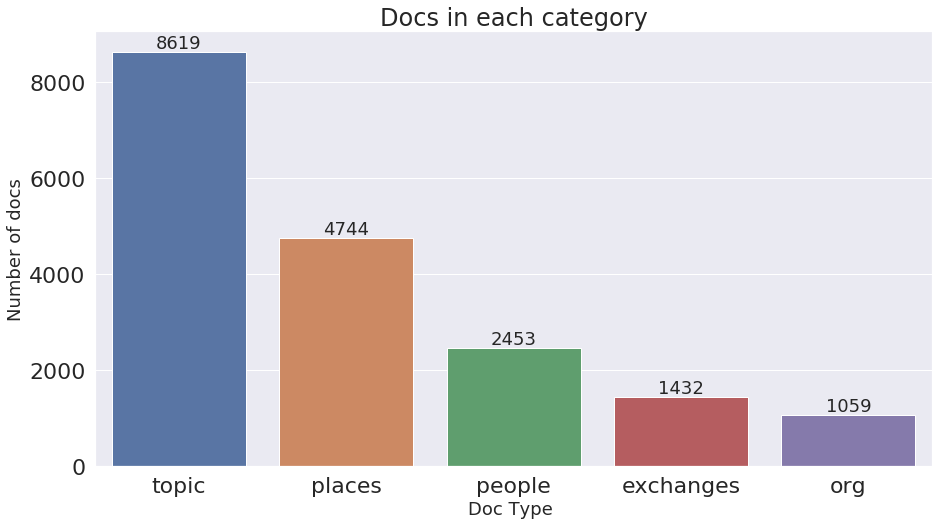

In [77]:
label = ['topics', 'places', 'people','exchanges', 'org']
import matplotlib.pyplot as plt
import seaborn as sns
categories = list(my_df_2.columns.values)
print(categories[1:])
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
# print(my_df_2.iloc[:,1:].sum().values)
ax= sns.barplot(categories[1:], my_df_2.iloc[:,1:].sum().values)

plt.title("Docs in each category", fontsize=24)
plt.ylabel('Number of docs', fontsize=18)
plt.xlabel('Doc Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = my_df_2.iloc[:,1:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

In [0]:
def getRankedOutput2(predicted_y):
  all_sorted_x = []
  for i in predicted_y:
    dict_temp={'Topics':i[0],'Places':i[1],'Peoples':i[2],'Exchanges':i[3],'Organizations':i[4]}
    sorted_x = sorted(dict_temp.items(), key=lambda kv: kv[1], reverse=True) 
    all_sorted_x.append(sorted_x)
  return all_sorted_x

In [0]:
def permissible(x, y):
  if (abs(x-y)) < 2:
    return True
  else:
    return False

def accuracy(predicted,actual):
    tp=0
    fp = 0
    tp_list = []
    length = len(actual)
   
    for one_doc_idx in range(length):
        if permissible(predicted[one_doc_idx][0],actual[one_doc_idx][0]) and permissible(predicted[one_doc_idx][1],actual[one_doc_idx][1])\
          and permissible(predicted[one_doc_idx][2],actual[one_doc_idx][2]) and permissible(predicted[one_doc_idx][3],actual[one_doc_idx][3]):
            tp+=1
            x = tp
        else:
          fp = 0
          x = fp
        tp_list.append(x)
    return tp/float(length), tp_list
  

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [0]:
X = np.array(encoded_docs)
y = np.array(one_hot_label_list)

In [0]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf = 5,random_state=0).fit(X, y)

In [22]:
import graphviz 
dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("decision_tree_cr") 


'decision_tree_cr.pdf'

In [0]:
doc_x_test = readFiles(test_data = True)
totalX_test ,encoded_docs_test = create_x_matrix(doc_x_test)
ground_truth_list = makeOneHotEncoding(totalX_test)

In [0]:
X_test = np.array(encoded_docs_test)
Y_test = np.array(ground_truth_list)

In [25]:
#Prediction and Calculating Accuracy
preds = clf.predict(X_test)
acc, tpl = accuracy(preds.tolist(), ground_truth_list)
print ("%f"%acc)
pred_rank_list = getRankedOutput2(np.array(preds))
actual_rank_list = getRankedOutput2(Y_test)

0.719565


In [0]:
pd.set_option('max_colwidth', 100)
my_df  = pd.DataFrame(columns = ['body', 'predicted ranking', 'actual ranking', '_'])
my_df['body'] = totalX_test
my_df['predicted ranking'] = pred_rank_list
my_df['actual ranking'] = actual_rank_list
my_df['_'] = tpl

In [27]:
my_df = my_df.sort_values(by='_', ascending=False).reset_index(drop=True)
my_df[['body', 'predicted ranking', 'actual ranking']]

,body,predicted ranking,actual ranking
0,prospect dominant alliance socialists environmentalists ended social democrats became biggest lo...,"[(Topics, 0.0), (Places, 0.0), (Peoples, 0.0), (Exchanges, 0.0), (Organizations, 0.0)]","[(Places, 1), (Topics, 0), (Peoples, 0), (Exchanges, 0), (Organizations, 0)]"
1,chase corp ltd chcawe said make offer fullypaid shares options entregrowth international ltd alr...,"[(Topics, 1.0), (Places, 0.0), (Peoples, 0.0), (Exchanges, 0.0), (Organizations, 0.0)]","[(Topics, 1), (Places, 0), (Peoples, 0), (Exchanges, 0), (Organizations, 0)]"
2,nippon shinpan co ltd nshtt agreed mastercard international issue new credit card called nippon ...,"[(Topics, 1.0), (Places, 0.0), (Peoples, 0.0), (Exchanges, 0.0), (Organizations, 0.0)]","[(Places, 1), (Topics, 0), (Peoples, 0), (Exchanges, 0), (Organizations, 0)]"
3,continental airlines inc said frontier airlines bought last year sought approval us bankruptcy c...,"[(Topics, 0.0), (Places, 0.0), (Peoples, 0.0), (Exchanges, 0.0), (Organizations, 0.0)]","[(Topics, 0), (Places, 0), (Peoples, 0), (Exchanges, 0), (Organizations, 0)]"
4,third quarter ended august 31 group shr 3492 yen vs 3474 group shr per ads 6984 vs 6948 net 420 ...,"[(Topics, 0.0), (Places, 0.0), (Peoples, 0.0), (Exchanges, 0.0), (Organizations, 0.0)]","[(Topics, 1), (Places, 0), (Peoples, 0), (Exchanges, 0), (Organizations, 0)]"
5,lebanons bankers association said extended suspension trading lebanese pound two working days st...,"[(Topics, 0.0), (Places, 0.0), (Peoples, 0.0), (Exchanges, 0.0), (Organizations, 0.0)]","[(Topics, 0), (Places, 0), (Peoples, 0), (Exchanges, 0), (Organizations, 0)]"
6,equiticorp holdings ltd equwwe owns received acceptances representing 5993 pct issued ordinary s...,"[(Topics, 0.0), (Places, 0.0), (Peoples, 0.0), (Exchanges, 0.0), (Organizations, 0.0)]","[(Topics, 0), (Places, 0), (Peoples, 0), (Exchanges, 0), (Organizations, 0)]"
7,british printing communication corporation plc bpcll proposed cancellation preference shares ret...,"[(Topics, 0.0), (Places, 0.0), (Peoples, 0.0), (Exchanges, 0.0), (Organizations, 0.0)]","[(Topics, 1), (Places, 0), (Peoples, 0), (Exchanges, 0), (Organizations, 0)]"
8,philippine 1987 inflation rate rise 48 pct 074 pct 1986 government implements employers associat...,"[(Topics, 0.0), (Places, 0.0), (Peoples, 0.0), (Exchanges, 0.0), (Organizations, 0.0)]","[(Topics, 1), (Places, 1), (Peoples, 0), (Exchanges, 0), (Organizations, 0)]"
9,finnish state launched two bonds totalling one billion markka loan periods 10 years five years a...,"[(Topics, 0.0), (Places, 0.0), (Peoples, 0.0), (Exchanges, 0.0), (Organizations, 0.0)]","[(Topics, 1), (Places, 0), (Peoples, 0), (Exchanges, 0), (Organizations, 0)]"


In [0]:
input_sample = "An editorial, leading article (US) or leader (UK), is an article written by the senior editorial staff or publisher of a newspaper, magazine, or any other written document, often unsigned. Australian and major United States newspapers, such as The New York Times and The Boston Globe,often classify editorials under the heading opinion. Illustrated editorials may appear in the form of editorial cartoons. Typically, a newspaper's editorial board evaluates which issues are important for their readership to know the newspaper's opinion on. Editorials are typically published on a dedicated page, called the editorial page, which often features letters to the editor from members of the public; the page opposite this page is called the op-ed page and frequently contains opinion pieces by writers not directly affiliated with the publication. However, a newspaper may choose to publish an editorial on the front page. In the English-language press, this occurs rarely and only on topics considered especially important; it is more common, however, in some European countries such as Spain, Italy, and France. Many newspapers publish their editorials without the name of the leader writer. Tom Clark, leader-writer for The Guardian, argues that it ensures that readers discuss the issue at hand rather than the author. On the other hand, an editorial does reflect the position of a newspaper and the head of the newspaper, the editor, is known by name. Whilst the editor will often not write the editorial themselves, they maintain oversight and retain responsibility. When The Press, a New Zealand newspaper based in Christchurch, changed after 157 years from broadsheet to compact in 2018, they published a list of editorials where current thinking differs from opinions expressed at the time. The starkest example was their view on women's suffrage in New Zealand after the government gave women the vote in 1893, where the editorial proclaimed that women would much prefer staying at home and attending to their household duties than going to the polling booths. In the field of fashion publishing, the term is often used to refer to photo-editorials – features with often full-page photographs on a particular theme, designer, model or other single topic, with or (as in a photo-essay) without accompanying text." 

In [50]:
sample_dict = {}
sample_dict['1'] = input_sample
sample_x_test ,encoded_docs_sample = create_x_matrix(sample_dict)
print (sample_x_test)
print (encoded_docs_sample)
X_sample = np.array(encoded_docs_sample)
preds = clf.predict(X_sample)
pred_rank_list = getRankedOutput2(np.array(preds))
print (pred_rank_list)

['editorial leading article us leader uk article written senior editorial staff publisher newspaper magazine written document often unsigned australian major united states newspapers new york times boston globe often classify editorials heading opinion illustrated editorials may appear form editorial cartoons typically newspapers editorial board evaluates issues important readership know newspapers opinion editorials typically published dedicated page called editorial page often features letters editor members public page opposite page called oped page frequently contains opinion pieces writers directly affiliated publication however newspaper may choose publish editorial front page englishlanguage press occurs rarely topics considered especially important common however european countries spain italy france many newspapers publish editorials without name leader writer tom clark leaderwriter guardian argues ensures readers discuss issue hand rather author hand editorial reflect positio